In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,KFold

In [2]:
df = pd.read_csv("creditcard.csv")
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


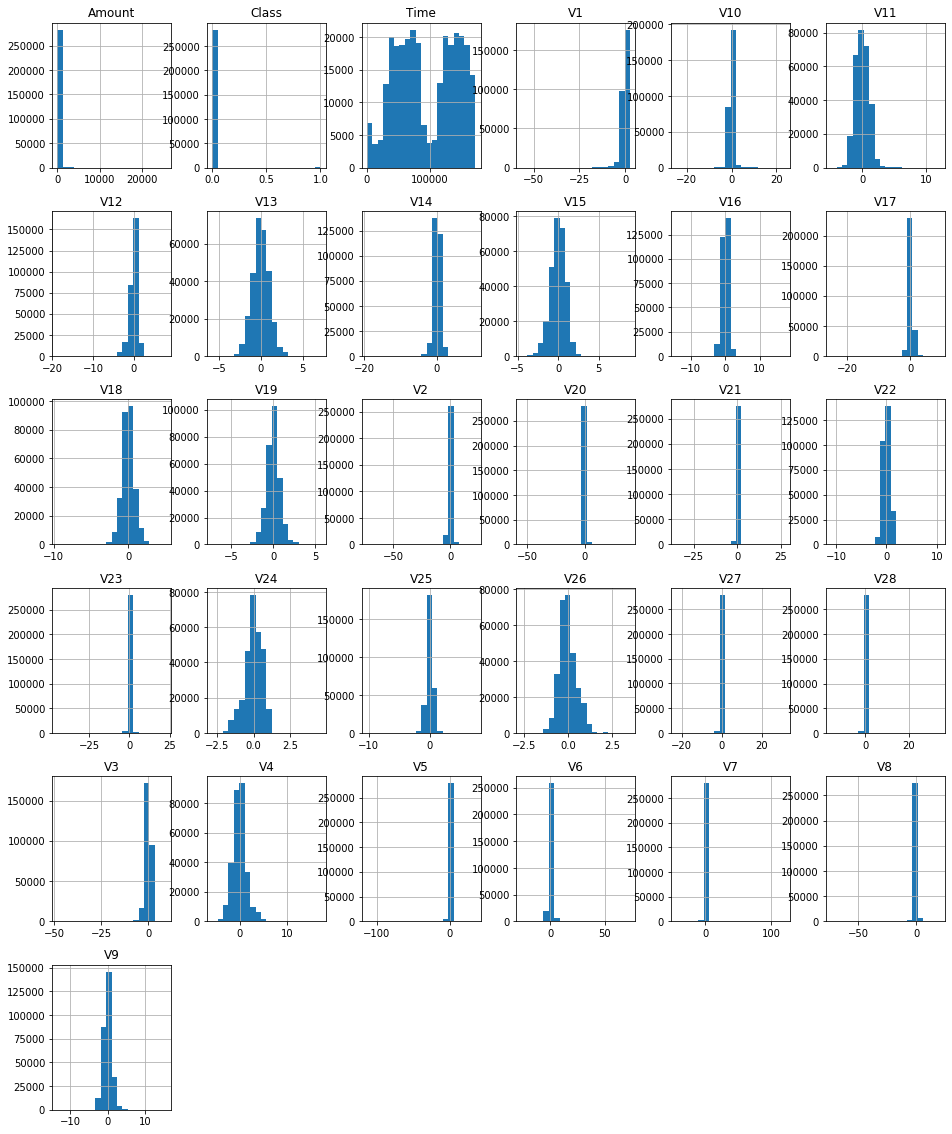

In [3]:
df.hist(bins = 20 , figsize= (16,20));

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<BarContainer object of 2 artists>

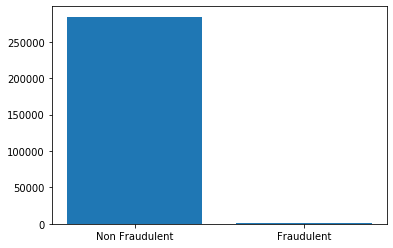

In [5]:
class1 = len(df[df['Class']==1])
class0 = len(df[df['Class']==0])
plt.bar(['Non Fraudulent', 'Fraudulent'],[class0,class1], align='center')

In [6]:
df_class_1 = df[df['Class']==1]
df_class_0 = df[df['Class']==0].sample(class1)
new_df = pd.concat([df_class_0,df_class_1])
new_df.sort_index(axis=0, ascending=True, inplace=True)
new_df.shape

(984, 31)

<BarContainer object of 2 artists>

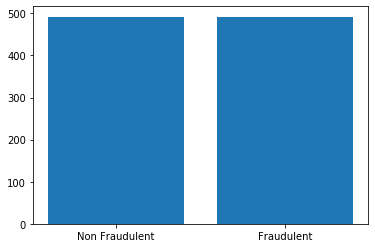

In [7]:
new_class1 = len(new_df[new_df['Class']==1])
new_class0 = len(new_df[new_df['Class']==0])
plt.bar(['Non Fraudulent', 'Fraudulent'],[new_class0,new_class1], align='center')

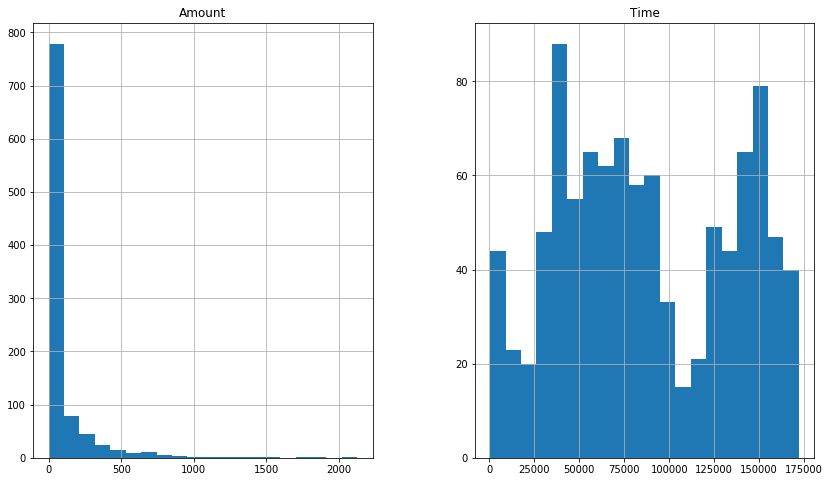

In [8]:
new_df[['Time','Amount']].hist(bins = 20 , figsize= (14,8));

In [9]:
x_data = new_df.drop(['Class'], axis =1)
y_data = new_df['Class']
print("X shape and y shape =" + str(x_data.shape) + " , " + str(y_data.shape))

X shape and y shape =(984, 30) , (984,)


# Random Forest Classifier

In [10]:
val_acc = []
kf = KFold(n_splits=5)
rf = RandomForestClassifier(n_estimators = 100)
for train_index, val_index in kf.split(x_data):
    rf.fit(x_data.iloc[train_index], y_data.iloc[train_index])
    val_acc.append(rf.score(x_data.iloc[val_index],y_data.iloc[val_index]))
accuracy = sum(val_acc)/len(val_acc)*100
print("The accuracy of the random forest classfier is {0:.2f}%".format(accuracy))

The accuracy of the random forest classfier is 93.80%


In [11]:
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size= 0.3, random_state=123)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
target_names = ['Not Fraudulent', 'Fraudulent']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

Not Fraudulent       0.92      0.95      0.93       142
    Fraudulent       0.95      0.92      0.94       154

      accuracy                           0.94       296
     macro avg       0.94      0.94      0.94       296
  weighted avg       0.94      0.94      0.94       296



In [12]:
from sklearn.metrics import recall_score
def hyperparam_tuning_rf(x_data,y_data, depth_list, estimator_list, min_split_list, min_leaf_list):
    X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size= 0.3, random_state=123)
    print("Metrics for number of estimators parameter")
    for estimator in estimator_list:
        rf = RandomForestClassifier(n_estimators = estimator)
        rf.fit(X_train,y_train)
        acc = rf.score(X_test,y_test)*100
        y_pred = rf.predict(X_test)
        recall = recall_score(y_test, y_pred, average='micro')*100
        print("\t n_estimators {0} Accuracy score {1:.2f}% recall score {2:.2f}%".format(estimator,acc,recall))
    print("\n")
    print("Metrics for max depth parameter")
    for depth in depth_list:
        rf = RandomForestClassifier(n_estimators = 100,max_depth= depth)
        rf.fit(X_train,y_train)
        acc = rf.score(X_test,y_test)*100
        y_pred = rf.predict(X_test)
        recall = recall_score(y_test, y_pred, average='micro')*100
        print("\t max_depth {0} Accuracy score {1:.2f}% recall score {2:.2f}%".format(depth,acc,recall))
    print("\n")
    print("Metrics for minimum number of samples for spliting node parameter")
    for min_split in min_split_list:
        rf = RandomForestClassifier(n_estimators = 100,min_samples_split= min_split)
        rf.fit(X_train,y_train)
        acc = rf.score(X_test,y_test)*100
        y_pred = rf.predict(X_test)
        recall = recall_score(y_test, y_pred, average='micro')*100
        print("\t min_samples_split {0} Accuracy score {1:.2f}% recall score {2:.2f}%".format(min_split,acc,recall))
    print("\n")
    print("Metrics for minimum number of samples for leaf node parameter")
    for min_leaf in min_leaf_list:
        rf = RandomForestClassifier(n_estimators = 100,min_samples_leaf = min_leaf)
        rf.fit(X_train,y_train)
        acc = rf.score(X_test,y_test)*100
        y_pred = rf.predict(X_test)
        recall = recall_score(y_test, y_pred, average='micro')*100
        print("\t min_samples_leaf {0} Accuracy score {1:.2f}% recall score {2:.2f}%".format(min_leaf,acc,recall))

In [13]:
estimator_list = [10,50,100,200,400,500]
depth_list = [1,2,5,10,15,20]
min_split_list = [2, 5, 10, 15, 100]
min_leaf_list = [1, 2, 5, 10,20,30,40]
hyperparam_tuning_rf(x_data,y_data, depth_list, estimator_list, min_split_list, min_leaf_list)

Metrics for number of estimators parameter
	 n_estimators 10 Accuracy score 93.24% recall score 93.24%
	 n_estimators 50 Accuracy score 93.92% recall score 93.92%
	 n_estimators 100 Accuracy score 93.24% recall score 93.24%
	 n_estimators 200 Accuracy score 93.92% recall score 93.92%
	 n_estimators 400 Accuracy score 93.58% recall score 93.58%
	 n_estimators 500 Accuracy score 93.58% recall score 93.58%


Metrics for max depth parameter
	 max_depth 1 Accuracy score 92.57% recall score 92.57%
	 max_depth 2 Accuracy score 93.58% recall score 93.58%
	 max_depth 5 Accuracy score 93.92% recall score 93.92%
	 max_depth 10 Accuracy score 93.92% recall score 93.92%
	 max_depth 15 Accuracy score 93.92% recall score 93.92%
	 max_depth 20 Accuracy score 93.24% recall score 93.24%


Metrics for minimum number of samples for spliting node parameter
	 min_samples_split 2 Accuracy score 93.24% recall score 93.24%
	 min_samples_split 5 Accuracy score 93.58% recall score 93.58%
	 min_samples_split 10 A

In [66]:
rf = RandomForestClassifier(n_estimators = 200,max_depth= 15, min_samples_split = 10, min_samples_leaf = 5)
val_acc = []
val_f1 = []
kf = KFold(n_splits=5)
for train_index, val_index in kf.split(x_data):
    rf.fit(x_data.iloc[train_index], y_data.iloc[train_index])
    val_acc.append(rf.score(x_data.iloc[val_index],y_data.iloc[val_index]))
    y_pred = rf.predict(x_data.iloc[val_index])
    val_f1.append(recall_score(y_data.iloc[val_index], y_pred, average='micro'))
accuracy = sum(val_acc)/len(val_acc)*100
f1_score = sum(val_f1)/len(val_f1)*100
print("The accuracy and recall score of the random forest classfier is {0:.2f}% and {1:.2f}%".format(accuracy,f1_score))

The accuracy and recall score of the random forest classfier is 94.21% and 94.21%


# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
def hyperparam_tuning_decision_tree(x_data,y_data, depth_list, min_split_list, min_leaf_list):
    X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size= 0.3, random_state=123)
    print("Metrics for max depth parameter")
    for depth in depth_list:
        dtree = DecisionTreeClassifier(max_depth= depth)
        dtree.fit(X_train,y_train)
        acc = dtree.score(X_test,y_test)*100
        y_pred = dtree.predict(X_test)
        recall = recall_score(y_test, y_pred, average='micro')*100
        print("\t max_depth {0} Accuracy score {1:.2f}% recall score {2:.2f}%".format(depth,acc,recall))
    print("\n")
    print("Metrics for minimum number of samples for spliting node parameter")
    for min_split in min_split_list:
        dtree = DecisionTreeClassifier(min_samples_split= min_split)
        dtree.fit(X_train,y_train)
        acc = dtree.score(X_test,y_test)*100
        y_pred = dtree.predict(X_test)
        recall = recall_score(y_test, y_pred, average='micro')*100
        print("\t min_samples_split {0} Accuracy score {1:.2f}% recall score {2:.2f}%".format(min_split,acc,recall))
    print("\n")
    print("Metrics for minimum number of samples for leaf node parameter")
    for min_leaf in min_leaf_list:
        dtree = DecisionTreeClassifier(min_samples_leaf = min_leaf)
        dtree.fit(X_train,y_train)
        acc = dtree.score(X_test,y_test)*100
        y_pred = dtree.predict(X_test)
        recall = recall_score(y_test, y_pred, average='micro')*100
        print("\t min_samples_leaf {0} Accuracy score {1:.2f}% recall score {2:.2f}%".format(min_leaf,acc,recall))

In [16]:
depth_list = [1,2,5,10,15,20,25,None]
min_split_list = [2, 5, 10, 15, 100]
min_leaf_list = [1, 2, 5, 10,20,30,40]
hyperparam_tuning_decision_tree(x_data,y_data, depth_list, min_split_list, min_leaf_list)

Metrics for max depth parameter
	 max_depth 1 Accuracy score 92.23% recall score 92.23%
	 max_depth 2 Accuracy score 90.88% recall score 90.88%
	 max_depth 5 Accuracy score 92.23% recall score 92.23%
	 max_depth 10 Accuracy score 91.55% recall score 91.55%
	 max_depth 15 Accuracy score 91.22% recall score 91.22%
	 max_depth 20 Accuracy score 91.55% recall score 91.55%
	 max_depth 25 Accuracy score 92.57% recall score 92.57%
	 max_depth None Accuracy score 92.23% recall score 92.23%


Metrics for minimum number of samples for spliting node parameter
	 min_samples_split 2 Accuracy score 90.54% recall score 90.54%
	 min_samples_split 5 Accuracy score 91.55% recall score 91.55%
	 min_samples_split 10 Accuracy score 92.23% recall score 92.23%
	 min_samples_split 15 Accuracy score 90.88% recall score 90.88%
	 min_samples_split 100 Accuracy score 93.24% recall score 93.24%


Metrics for minimum number of samples for leaf node parameter
	 min_samples_leaf 1 Accuracy score 90.20% recall score 9

In [17]:
dtree = DecisionTreeClassifier(max_depth= 5, min_samples_split = 5, min_samples_leaf = 20)
val_acc = []
val_f1 = []
kf = KFold(n_splits=5)
for train_index, val_index in kf.split(x_data):
    dtree.fit(x_data.iloc[train_index], y_data.iloc[train_index])
    val_acc.append(dtree.score(x_data.iloc[val_index],y_data.iloc[val_index]))
    y_pred_tree = dtree.predict(x_data.iloc[val_index])
    val_f1.append(recall_score(y_data.iloc[val_index], y_pred_tree, average='micro'))
accuracy = sum(val_acc)/len(val_acc)*100
f1_score = sum(val_f1)/len(val_f1)*100
print("The accuracy and recall score of the decision tree classfier is {0:.2f}% and {1:.2f}%".format(accuracy,f1_score))

The accuracy and recall score of the decision tree classfier is 92.38% and 92.38%


# Adaboosted Tree

In [18]:
from sklearn.ensemble import AdaBoostClassifier
def hyperparam_tuning_adaboosted_tree(x_data,y_data, estimators_list, learning_rate_list):
    X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size= 0.3, random_state=123)
    dtree = DecisionTreeClassifier(max_depth= 5, min_samples_split = 5, min_samples_leaf = 20)
    print("Metrics for number of estimator parameter")
    for estimators in estimators_list:
        adabc = AdaBoostClassifier(base_estimator=dtree, n_estimators=50)
        adabc.fit(X_train,y_train)
        acc = adabc.score(X_test,y_test)*100
        y_pred = adabc.predict(X_test)
        recall = recall_score(y_test, y_pred, average='micro')*100
        print("\t n_estimators {0} Accuracy score {1:.2f}% recall score {2:.2f}%".format(estimators,acc,recall))
    print("\n")
    print("Metrics for learning rate parameter")
    for rate in learning_rate_list:
        adabc = AdaBoostClassifier(base_estimator=dtree, learning_rate = rate)
        adabc.fit(X_train,y_train)
        acc = adabc.score(X_test,y_test)*100
        y_pred = adabc.predict(X_test)
        recall = recall_score(y_test, y_pred, average='micro')*100
        print("\t learning_rate {0} Accuracy score {1:.2f}% recall score {2:.2f}%".format(rate,acc,recall))
    print("\n")

In [19]:
estimator_list = [10,50,100,200,400,500]
learning_rate_list = [0.01,0.05,0.1,0.5,1,10]
hyperparam_tuning_adaboosted_tree(x_data,y_data, estimator_list, learning_rate_list)

Metrics for number of estimator parameter
	 n_estimators 10 Accuracy score 92.57% recall score 92.57%
	 n_estimators 50 Accuracy score 92.23% recall score 92.23%
	 n_estimators 100 Accuracy score 93.92% recall score 93.92%
	 n_estimators 200 Accuracy score 92.91% recall score 92.91%
	 n_estimators 400 Accuracy score 92.23% recall score 92.23%
	 n_estimators 500 Accuracy score 93.24% recall score 93.24%


Metrics for learning rate parameter
	 learning_rate 0.01 Accuracy score 93.58% recall score 93.58%
	 learning_rate 0.05 Accuracy score 93.92% recall score 93.92%
	 learning_rate 0.1 Accuracy score 93.24% recall score 93.24%
	 learning_rate 0.5 Accuracy score 91.22% recall score 91.22%
	 learning_rate 1 Accuracy score 93.58% recall score 93.58%
	 learning_rate 10 Accuracy score 81.76% recall score 81.76%




In [20]:
dtree = DecisionTreeClassifier(max_depth= 5, min_samples_split = 5, min_samples_leaf = 20)
adabc = AdaBoostClassifier(base_estimator=dtree, n_estimators=100, learning_rate = 1)
val_acc = []
val_f1 = []
kf = KFold(n_splits=5)
for train_index, val_index in kf.split(x_data):
    adabc.fit(x_data.iloc[train_index], y_data.iloc[train_index])
    val_acc.append(adabc.score(x_data.iloc[val_index],y_data.iloc[val_index]))
    y_pred_tree = adabc.predict(x_data.iloc[val_index])
    val_f1.append(recall_score(y_data.iloc[val_index], y_pred_tree, average='micro'))
accuracy = sum(val_acc)/len(val_acc)*100
f1_score = sum(val_f1)/len(val_f1)*100
print("The accuracy and recall score of the adaboosted tree classfier is {0:.2f}% and {1:.2f}%".format(accuracy,f1_score))

The accuracy and recall score of the adaboosted tree classfier is 93.60% and 93.60%


# Gradient Boosted Tree

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
def hyperparam_tuning_gradientboosted_tree(x_data,y_data, estimators_list, learning_rate_list, min_split_list, min_leaf_list):
    X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size= 0.3, random_state=123)
    print("Metrics for number of estimator parameter")
    for estimators in estimators_list:
        gbc = GradientBoostingClassifier(n_estimators = estimators)
        gbc.fit(X_train,y_train)
        acc = gbc.score(X_test,y_test)*100
        y_pred = gbc.predict(X_test)
        recall = recall_score(y_test, y_pred, average='micro')*100
        print("\t n_estimators {0} Accuracy score {1:.2f}% recall score {2:.2f}%".format(estimators,acc,recall))
    print("\n")
    print("Metrics for learning rate parameter")
    for rate in learning_rate_list:
        gbc = GradientBoostingClassifier(learning_rate = rate)
        gbc.fit(X_train,y_train)
        acc = gbc.score(X_test,y_test)*100
        y_pred = gbc.predict(X_test)
        recall = recall_score(y_test, y_pred, average='micro')*100
        print("\t learning_rate {0} Accuracy score {1:.2f}% recall score {2:.2f}%".format(rate,acc,recall))
    print("\n")
    print("Metrics for minimum number of samples for spliting node parameter")
    for min_split in min_split_list:
        gbc = GradientBoostingClassifier(min_samples_split = min_split)
        gbc.fit(X_train,y_train)
        acc = gbc.score(X_test,y_test)*100
        y_pred = gbc.predict(X_test)
        recall = recall_score(y_test, y_pred, average='micro')*100
        print("\t min_samples_split {0} Accuracy score {1:.2f}% recall score {2:.2f}%".format(min_split,acc,recall))
    print("\n")
    print("Metrics for minimum number of samples for leaf node parameter")
    for min_leaf in min_leaf_list:
        gbc = GradientBoostingClassifier(min_samples_leaf = min_leaf)
        gbc.fit(X_train,y_train)
        acc = gbc.score(X_test,y_test)*100
        y_pred = gbc.predict(X_test)
        recall = recall_score(y_test, y_pred, average='micro')*100
        print("\t min_samples_leaf {0} Accuracy score {1:.2f}% recall score {2:.2f}%".format(min_leaf,acc,recall))

In [22]:
estimator_list = [10,50,100,200,400,500]
learning_rate_list = [0.01,0.05,0.1,0.5,1,10]
min_split_list = [2, 5, 10, 15, 100]
min_leaf_list = [1, 2, 5, 10,20,30,40]
hyperparam_tuning_gradientboosted_tree(x_data,y_data, estimator_list, learning_rate_list, min_split_list, min_leaf_list)

Metrics for number of estimator parameter
	 n_estimators 10 Accuracy score 92.91% recall score 92.91%
	 n_estimators 50 Accuracy score 93.24% recall score 93.24%
	 n_estimators 100 Accuracy score 92.23% recall score 92.23%
	 n_estimators 200 Accuracy score 92.23% recall score 92.23%
	 n_estimators 400 Accuracy score 92.57% recall score 92.57%
	 n_estimators 500 Accuracy score 92.23% recall score 92.23%


Metrics for learning rate parameter
	 learning_rate 0.01 Accuracy score 92.91% recall score 92.91%
	 learning_rate 0.05 Accuracy score 93.24% recall score 93.24%
	 learning_rate 0.1 Accuracy score 92.23% recall score 92.23%
	 learning_rate 0.5 Accuracy score 92.57% recall score 92.57%
	 learning_rate 1 Accuracy score 91.22% recall score 91.22%
	 learning_rate 10 Accuracy score 52.03% recall score 52.03%


Metrics for minimum number of samples for spliting node parameter
	 min_samples_split 2 Accuracy score 91.89% recall score 91.89%
	 min_samples_split 5 Accuracy score 93.24% recall sc

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.1, min_samples_split = 2, min_samples_leaf = 2)
val_acc = []
val_f1 = []
kf = KFold(n_splits=5)
for train_index, val_index in kf.split(x_data):
    gbc.fit(x_data.iloc[train_index], y_data.iloc[train_index])
    val_acc.append(gbc.score(x_data.iloc[val_index],y_data.iloc[val_index]))
    y_pred = gbc.predict(x_data.iloc[val_index])
    val_f1.append(recall_score(y_data.iloc[val_index], y_pred, average='micro'))
accuracy = sum(val_acc)/len(val_acc)*100
f1_score = sum(val_f1)/len(val_f1)*100
print("The accuracy and recall score of the gradient boosted tree classfier is {0:.2f}% and {1:.2f}%".format(accuracy,f1_score))

The accuracy and recall score of the gradient boosted tree classfier is 91.96% and 91.96%


# XG Boosted Tree

In [24]:
from xgboost import XGBClassifier
val_acc = []
val_f1 = []
kf = KFold(n_splits=5)
xgbc = XGBClassifier()
for train_index, val_index in kf.split(x_data):
    xgbc.fit(x_data.iloc[train_index], y_data.iloc[train_index])
    val_acc.append(xgbc.score(x_data.iloc[val_index],y_data.iloc[val_index]))
    y_pred = xgbc.predict(x_data.iloc[val_index])
    val_f1.append(recall_score(y_data.iloc[val_index], y_pred, average='micro'))
accuracy = sum(val_acc)/len(val_acc)*100
f1_score = sum(val_f1)/len(val_f1)*100
print("The accuracy and recall score of the xgboost tree classfier is {0:.2f}% and {1:.2f}%".format(accuracy,f1_score))

The accuracy and recall score of the xgboost tree classfier is 94.11% and 94.11%


In [25]:
def hyperparam_tuning_xgboost_tree(x_data,y_data, depth_list, learning_rate_list, booster_list):
    X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size= 0.3, random_state=123)
    print("Metrics for max depth parameter")
    for depth in depth_list:
        xgbc = XGBClassifier(max_depth = depth)
        xgbc.fit(X_train,y_train)
        acc = xgbc.score(X_test,y_test)*100
        y_pred = xgbc.predict(X_test)
        recall = recall_score(y_test, y_pred, average='micro')*100
        print("\t max depth {0} Accuracy score {1:.2f}% recall score {2:.2f}%".format(depth,acc,recall))
    print("\n")
    print("Metrics for learning rate parameter")
    for rate in learning_rate_list:
        xgbc = XGBClassifier(learning_rate = rate)
        xgbc.fit(X_train,y_train)
        acc = xgbc.score(X_test,y_test)*100
        y_pred = xgbc.predict(X_test)
        recall = recall_score(y_test, y_pred, average='micro')*100
        print("\t learning_rate {0} Accuracy score {1:.2f}% recall score {2:.2f}%".format(rate,acc,recall))
    print("\n")
    print("Metrics for booster parameter")
    for boost in booster_list:
        xgbc = XGBClassifier(booster = boost)
        xgbc.fit(X_train,y_train)
        acc = xgbc.score(X_test,y_test)*100
        y_pred = xgbc.predict(X_test)
        recall = recall_score(y_test, y_pred, average='micro')*100
        print("\t booster {0} Accuracy score {1:.2f}% recall score {2:.2f}%".format(boost,acc,recall))
    print("\n")

In [26]:
depth_list = [1,2,5,10,15,20,25,None]
learning_rate_list = [0.01,0.05,0.1,0.5,1,10]
booster_list = ["gbtree", "gblinear", "dart"]
hyperparam_tuning_xgboost_tree(x_data,y_data, depth_list, learning_rate_list, booster_list)

Metrics for max depth parameter
	 max depth 1 Accuracy score 92.91% recall score 92.91%
	 max depth 2 Accuracy score 92.57% recall score 92.57%
	 max depth 5 Accuracy score 92.57% recall score 92.57%
	 max depth 10 Accuracy score 92.57% recall score 92.57%
	 max depth 15 Accuracy score 92.57% recall score 92.57%
	 max depth 20 Accuracy score 92.57% recall score 92.57%
	 max depth 25 Accuracy score 92.57% recall score 92.57%
	 max depth None Accuracy score 92.91% recall score 92.91%


Metrics for learning rate parameter
	 learning_rate 0.01 Accuracy score 92.57% recall score 92.57%
	 learning_rate 0.05 Accuracy score 93.58% recall score 93.58%
	 learning_rate 0.1 Accuracy score 92.91% recall score 92.91%
	 learning_rate 0.5 Accuracy score 92.57% recall score 92.57%
	 learning_rate 1 Accuracy score 93.58% recall score 93.58%
	 learning_rate 10 Accuracy score 52.03% recall score 52.03%


Metrics for booster parameter
	 booster gbtree Accuracy score 92.91% recall score 92.91%
	 booster gbl

In [27]:
val_acc = []
val_f1 = []
kf = KFold(n_splits=5)
xgbc = XGBClassifier(max_depth = 2, learning_rate = 0.05, booster = "gblinear")
for train_index, val_index in kf.split(x_data):
    xgbc.fit(x_data.iloc[train_index], y_data.iloc[train_index])
    val_acc.append(xgbc.score(x_data.iloc[val_index],y_data.iloc[val_index]))
    y_pred = xgbc.predict(x_data.iloc[val_index])
    val_f1.append(recall_score(y_data.iloc[val_index], y_pred, average='micro'))
accuracy = sum(val_acc)/len(val_acc)*100
f1_score = sum(val_f1)/len(val_f1)*100
print("The accuracy and recall score of the xgboost tree classfier is {0:.2f}% and {1:.2f}%".format(accuracy,f1_score))

[19:55:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:55:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:55:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bi

# LightGBM Classifier

In [28]:
from lightgbm import LGBMClassifier
val_acc = []
val_f1 = []
kf = KFold(n_splits=5)
lgbc = LGBMClassifier(n_estimators = 100)
for train_index, val_index in kf.split(x_data):
    lgbc.fit(x_data.iloc[train_index], y_data.iloc[train_index])
    val_acc.append(lgbc.score(x_data.iloc[val_index],y_data.iloc[val_index]))
    y_pred = lgbc.predict(x_data.iloc[val_index])
    val_f1.append(recall_score(y_data.iloc[val_index], y_pred, average='micro'))
accuracy = sum(val_acc)/len(val_acc)*100
f1_score = sum(val_f1)/len(val_f1)*100
print("The accuracy and recall score of the lightgbm classfier is {0:.2f}% and {1:.2f}%".format(accuracy,f1_score))

The accuracy and recall score of the lightgbm classfier is 94.00% and 94.00%


In [31]:
def hyperparam_tuning_lightgbm_tree(x_data,y_data, estimators_list, depth_list, learning_rate_list, num_leaves_list):
    X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size= 0.3, random_state=123)
    print("Metrics for number of estimators parameter")
    for estimators in estimators_list:
        lgbc = LGBMClassifier(n_estimators = estimators)
        lgbc.fit(X_train,y_train)
        acc = lgbc.score(X_test,y_test)*100
        y_pred = lgbc.predict(X_test)
        recall = recall_score(y_test, y_pred, average='micro')*100
        print("\t n_estimators {0} Accuracy score {1:.2f}% recall score {2:.2f}%".format(estimators,acc,recall))
    print("\n")
    print("Metrics for max depth parameter")
    for depth in depth_list:
        lgbc = LGBMClassifier(max_depth = depth)
        lgbc.fit(X_train,y_train)
        acc = lgbc.score(X_test,y_test)*100
        y_pred = lgbc.predict(X_test)
        recall = recall_score(y_test, y_pred, average='micro')*100
        print("\t max depth {0} Accuracy score {1:.2f}% recall score {2:.2f}%".format(depth,acc,recall))
    print("\n")
    print("Metrics for learning rate parameter")
    for rate in learning_rate_list:
        lgbc = LGBMClassifier(learning_rate = rate)
        lgbc.fit(X_train,y_train)
        acc = lgbc.score(X_test,y_test)*100
        y_pred = lgbc.predict(X_test)
        recall = recall_score(y_test, y_pred, average='micro')*100
        print("\t learning_rate {0} Accuracy score {1:.2f}% recall score {2:.2f}%".format(rate,acc,recall))
    print("\n")
    print("Metrics for num of leaves parameter")
    for leaves in num_leaves_list:
        lgbc = LGBMClassifier(num_leaves = leaves)
        lgbc.fit(X_train,y_train)
        acc = lgbc.score(X_test,y_test)*100
        y_pred = lgbc.predict(X_test)
        recall = recall_score(y_test, y_pred, average='micro')*100
        print("\t num_leaves {0} Accuracy score {1:.2f}% recall score {2:.2f}%".format(leaves,acc,recall))
    print("\n")

In [32]:
depth_list = [1,2,5,10,15,20,25,None]
learning_rate_list = [0.01,0.05,0.1,0.5,1,10]
num_leaves_list = [10,20,30,40,50,60]
estimator_list = [10,50,100,200,400,500]
hyperparam_tuning_lightgbm_tree(x_data,y_data, estimator_list, depth_list, learning_rate_list, num_leaves_list)

Metrics for number of estimators parameter
	 n_estimators 10 Accuracy score 93.92% recall score 93.92%
	 n_estimators 50 Accuracy score 93.24% recall score 93.24%
	 n_estimators 100 Accuracy score 93.24% recall score 93.24%
	 n_estimators 200 Accuracy score 92.91% recall score 92.91%
	 n_estimators 400 Accuracy score 92.57% recall score 92.57%
	 n_estimators 500 Accuracy score 92.57% recall score 92.57%


Metrics for max depth parameter
	 max depth 1 Accuracy score 93.92% recall score 93.92%
	 max depth 2 Accuracy score 93.24% recall score 93.24%
	 max depth 5 Accuracy score 92.91% recall score 92.91%
	 max depth 10 Accuracy score 92.91% recall score 92.91%
	 max depth 15 Accuracy score 93.24% recall score 93.24%
	 max depth 20 Accuracy score 93.24% recall score 93.24%
	 max depth 25 Accuracy score 93.24% recall score 93.24%
	 max depth None Accuracy score 93.24% recall score 93.24%


Metrics for learning rate parameter
	 learning_rate 0.01 Accuracy score 94.26% recall score 94.26%
	 l

In [40]:
val_acc = []
val_f1 = []
kf = KFold(n_splits=5)
lgbc = LGBMClassifier(n_estimators = 100, max_depth = 2, learning_rate = 0.05, num_leaves = 20)
for train_index, val_index in kf.split(x_data):
    lgbc.fit(x_data.iloc[train_index], y_data.iloc[train_index])
    val_acc.append(lgbc.score(x_data.iloc[val_index],y_data.iloc[val_index]))
    y_pred = lgbc.predict(x_data.iloc[val_index])
    val_f1.append(recall_score(y_data.iloc[val_index], y_pred, average='micro'))
accuracy = sum(val_acc)/len(val_acc)*100
f1_score = sum(val_f1)/len(val_f1)*100
print("The accuracy and recall score of the lightGbm tree classfier is {0:.2f}% and {1:.2f}%".format(accuracy,f1_score))

The accuracy and recall score of the lightGbm tree classfier is 94.11% and 94.11%


# Random Forest VS XGBoost Tree

In [67]:
#Bias Variance Curve for Random Forest
test_size_list = [0.99,0.8,0.7,0.5,0.4,0.3,0.2]
training_set_size=[]
train_acc=[]
test_acc=[]
for test_size in test_size_list:
    X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size= test_size, random_state=123)
    rf = RandomForestClassifier(n_estimators = 200,max_depth= 15, min_samples_split = 10, min_samples_leaf = 5)
    rf.fit(X_train,y_train)
    train_acc.append(rf.score(X_train,y_train))
    test_acc.append(rf.score(X_test,y_test))
    training_set_size.append(len(X_train))

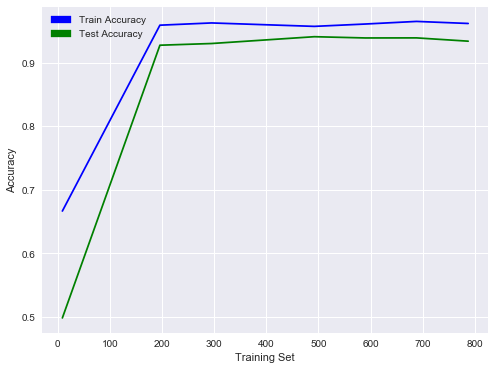

In [68]:
import matplotlib.patches as mpatches
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
plt.plot(training_set_size, train_acc, color = "blue") 
plt.plot(training_set_size, test_acc, color = "green") 
plt.xlabel("Training Set") 
plt.ylabel("Accuracy")
trainlegend = mpatches.Patch(color='blue', label='Train Accuracy')
testlegend = mpatches.Patch(color='green', label='Test Accuracy')
plt.legend([trainlegend, testlegend], ['Train Accuracy', 'Test Accuracy'])
plt.show() 

In [69]:
#Bias Variance Curve for XGboosted Tree
test_size_list = [0.99,0.8,0.7,0.5,0.4,0.3,0.2]
training_set_size=[]
train_acc=[]
test_acc=[]
for test_size in test_size_list:
    X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size= test_size, random_state=123)
    xgbc = XGBClassifier(max_depth = 2, learning_rate = 0.05, booster = "gblinear")
    xgbc.fit(X_train,y_train)
    train_acc.append(xgbc.score(X_train,y_train))
    test_acc.append(xgbc.score(X_test,y_test))
    training_set_size.append(len(X_train))

[21:34:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:34:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:34:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bi

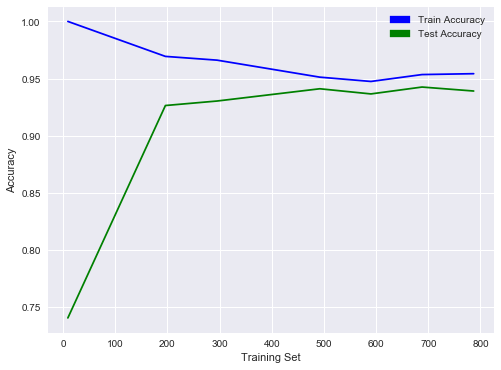

In [70]:
import matplotlib.patches as mpatches
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
plt.plot(training_set_size, train_acc, color = "blue") 
plt.plot(training_set_size, test_acc, color = "green") 
plt.xlabel("Training Set") 
plt.ylabel("Accuracy")
trainlegend = mpatches.Patch(color='blue', label='Train Accuracy')
testlegend = mpatches.Patch(color='green', label='Test Accuracy')
plt.legend([trainlegend, testlegend], ['Train Accuracy', 'Test Accuracy'])
plt.show() 

In [71]:
x_data_whole = df.drop(['Class'], axis =1)
y_data_whole = df['Class']
print("X shape and y shape =" + str(x_data_whole.shape) + " , " + str(y_data_whole.shape))

X shape and y shape =(284807, 30) , (284807,)


In [72]:
X_train, X_test, y_train, y_test = train_test_split(x_data_whole, y_data_whole, test_size= 0.7, random_state=123)
rf = RandomForestClassifier(n_estimators = 200,max_depth= 15, min_samples_split = 10, min_samples_leaf = 5)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
target_names = ['Non Fraudulent', 'Fraudulent']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00    199012
    Fraudulent       0.88      0.76      0.81       353

      accuracy                           1.00    199365
     macro avg       0.94      0.88      0.91    199365
  weighted avg       1.00      1.00      1.00    199365



In [73]:
X_train, X_test, y_train, y_test = train_test_split(x_data_whole, y_data_whole, test_size= 0.7, random_state=123)
xgbc = XGBClassifier(max_depth = 2, learning_rate = 0.05, booster = "gblinear")
xgbc.fit(X_train,y_train)
y_pred = xgbc.predict(X_test)
target_names = ['Non Fraudulent', 'Fraudulent']
print(classification_report(y_test, y_pred, target_names=target_names))

[21:36:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00    199012
    Fraudulent       0.83      0.63      0.72       353

      accuracy                           1.00    199365
     macro avg       0.92      0.81      0.86    199365
  weighted avg       1.00      1.00      1.00    199365

